# Clustering

## k-Means Clustering

The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset. There are many different types of clustering methods, but k-means is one of the oldest and most approachable. K-menas is an example of Partional clustering.
Partitional clustering divides data objects into nonoverlapping groups. In other words, no object can be a member of more than one cluster, and every cluster must have at least one object.

These techniques require the user to specify the number of clusters, indicated by the variable k. Many partitional clustering algorithms work through an iterative process to assign subsets of data points into k clusters. 

Partitional clustering methods have several strengths:

- They work well when clusters have a spherical shape.
- They’re scalable with respect to algorithm complexity.

They also have several weaknesses:

- They’re not well suited for clusters with complex shapes and different sizes.
- They break down when used with clusters of different densities.

Tutorial adapted from: https://realpython.com/k-means-clustering-python/

Here is the algorithm for k-means
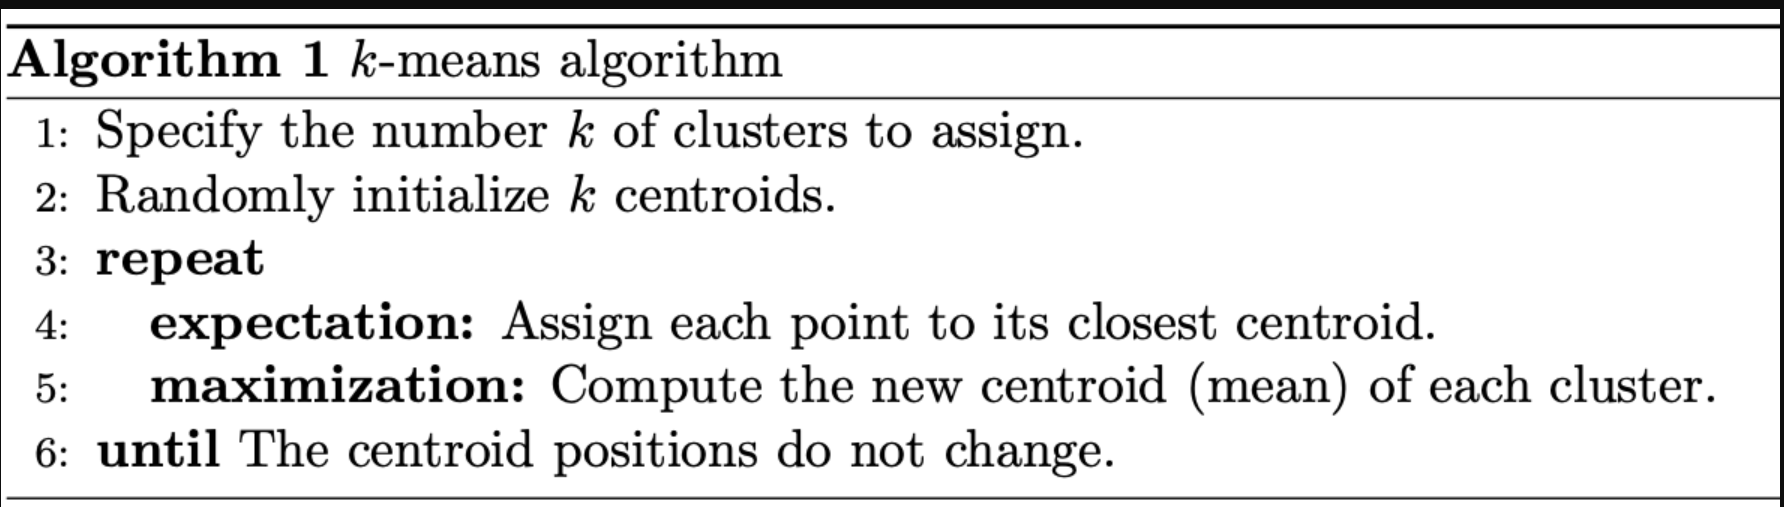

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# allow multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Let's load a dataset for clustering using make_blobs() from sklearn.


In [ ]:
# Load libraries
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Generating our dataset

make_blobs() uses these parameters:

- n_samples is the total number of samples to generate.
- centers is the number of centers to generate.
- cluster_std is the standard deviation.

make_blobs() returns a tuple of two values:

- A two-dimensional NumPy array with the x- and y-values for each of the samples
- A one-dimensional NumPy array containing the cluster labels for each sample

In [ ]:
features, true_labels = make_blobs(
      n_samples=200,
      centers=3,
      cluster_std=2.75,
      random_state=42 )

Let's look at the first five elements for each of the variables returned by make_blobs():

In [ ]:
features[:5]

In [ ]:
true_labels[:5]

Let's plot our dataset.
Some parameters of scatter plot:
- c array-like or list of colors or color, optional. It could take a sequence of  n numbers to be mapped to colors using cmap and norm. In our case we will use the cluster number as the value of this parameter to achieve that every cluster is plotted in a different color.
- s is the size of the dots in the plot

In [ ]:
plt.figure(1)
plt.scatter(features[:, 0], features[:, 1], s=30, c=true_labels) 
plt.title("our dataset")
plt.show()

### Feature Scaling

Data sets usually contain numerical features that have been measured in different units, such as height (in inches) and weight (in pounds). A machine learning algorithm would consider weight more important than height only because the values for weight are larger and have higher variability from person to person.

Machine learning algorithms need to consider all features on an even playing field. That means the values for all features must be transformed to the same scale.

The process of transforming numerical features to use the same scale is known as feature scaling. It’s an important data preprocessing step for most distance-based machine learning algorithms because it can have a significant impact on the performance of your algorithm.

There are several approaches to implementing feature scaling. In this example, we’ll use the StandardScaler class. This class implements a type of feature scaling called standardization. Standardization scales, or shifts, the values for each numerical feature in your dataset so that the features have a mean of 0 and standard deviation of 1.

Recall that StandardScaler is a scikit-learn transformer object. These are the methods for transformers
- fit method, which learns model parameters (e.g. mean and standard deviation for normalization) from a training set,
- transform method which applies this transformation model to unseen data.
- fit_transform may be more convenient and efficient for modelling and transforming the training data simultaneously.


In [ ]:
# Standarize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


Take a look at how the values have been scaled in scaled_features:

In [ ]:
scaled_features[:5]

Let's plot again our clusters with the scaled data

In [ ]:
plt.figure(1)
plt.scatter(scaled_features[:, 0],scaled_features[:, 1], s=30, c=true_labels) 
plt.title("our dataset")
plt.show()

### Conduct k-Means Clustering

Now the data are ready to be clustered. The KMeans estimator class in scikit-learn is where you set the algorithm parameters before fitting the estimator to the data. The scikit-learn implementation is flexible, providing several parameters that can be tuned.

Here are the parameters used in this example:

- *init* controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random". You can also set it to "k-means++" smart initialization technique.

- *n_clusters* sets k for the clustering step. This is the most important parameter for k-means.

- *n_init* sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest  inertia or SSE (sum of the squared Euclidean distances of each point to its closest centroid).

- *max_iter* sets the number of maximum iterations for each initialization of the k-means algorithm.

Instantiate the KMeans class with the following arguments:

In [ ]:
# Create k-mean object
kmeans = KMeans(
           init="random",
           n_clusters=3,
           n_init=10,
           max_iter=300,
           random_state=42
 )


Now that the k-means class is ready, the next step is to fit it to the data in scaled_features. This will perform ten runs of the k-means algorithm on your data with a maximum of 300 iterations per run:

In [ ]:
kmeans.fit(scaled_features)

Recall that after data is fitted with an estimator, parameters are estimated from the data at hand. 
All the estimated parameters are attributes of the estimator object ending by an underscore, example cluster_centers_.
Statistics from the initialization run with the lowest SSE (intertia) are available as attributes of kmeans after calling .fit():

In [ ]:
# The lowest SSE value
kmeans.inertia_



In [ ]:
# Final locations of the centroid
kmeans.cluster_centers_


In [ ]:

# The number of iterations required to converge
kmeans.n_iter_

Finally, the cluster assignments are stored as a one-dimensional NumPy array in kmeans.labels_. Here’s a look at the first five predicted labels:

In [ ]:
kmeans.labels_[:5]

Note that the order of the cluster labels for the first two data objects was flipped. The order was [1, 0] in true_labels but [0, 1] in kmeans.labels_ even though those data objects are still members of their original clusters in kmeans.lables_.

This behavior is normal, as the ordering of cluster labels is dependent on the initialization. Cluster 0 from the first run could be labeled cluster 1 in the second run and vice versa. This doesn’t affect clustering evaluation metrics.

Let's plot our clusters as found by the kmeans algorithm.
Another parameter of scatter plot is alpha which is the blending value, between 0 (transparent) and 1 (opaque).

In [ ]:
plt.figure(1)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], s=30, c=kmeans.labels_) 
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=60, alpha=0.5, marker='*')
plt.title("clusters found by kmeans")
plt.show()

## Choosing k, the number of clusters

Now let's look at two methods that are commonly used to evaluate the appropriate number of clusters:

- The elbow method
- The silhouette coefficient

These are often used as complementary evaluation techniques rather than one being preferred over the other. To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE.

Recall from the last notebook:
 ** *kwargs allow you to pass  variable-length argument list arguments to a function.
The double star *** allows us to pass through keyword arguments (and any number of them).
A keyword argument is where you provide a name to the variable as you pass it into the function.
One can think of the kwargs as being a dictionary that maps each keyword to the value that we pass alongside it. 

In [ ]:
kmeans_kwargs = {
      "init": "random",
       "n_init": 10,
       "max_iter": 300,
       "random_state": 42,
 }

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(scaled_features)
     sse.append(kmeans.inertia_)

When you plot SSE as a function of the number of clusters, notice that SSE continues to decrease as you increase k. As more centroids are added, the distance from each point to its closest centroid will decrease.

There’s a sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters. In this example, the elbow is located at x=3:

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Determining the elbow point in the SSE curve isn’t always straightforward.

The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

- How close the data point is to other points in the cluster
- How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In the scikit-learn implementation of the silhouette coefficient, the average silhouette coefficient of all the samples is summarized into one score. The silhouette score() function needs a minimum of two clusters, or it will raise an exception.

Let's loop through values of k again. This time, instead of computing SSE, we compute the silhouette coefficient.

In [ ]:
from sklearn.metrics import silhouette_score
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Plotting the average silhouette scores for each k shows that the best choice for k is 3 since it has the maximum score.

Now let's calculate Davies-Bouldin Index which requires simpler calculation than that of Silhouette scores.
Drawbacks:
- The Davies-Boulding index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained from DBSCAN.

- The usage of centroid distance limits the distance metric to Euclidean space.

In [ ]:
from sklearn.metrics import davies_bouldin_score
# A list holds the DB score for each k
DB_score = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = davies_bouldin_score(scaled_features, kmeans.labels_)
    DB_score.append(score)


In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), DB_score)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Davies Bouldin Score")
plt.show()

A lower Davies-Bouldin index relates to a model with better separation between the clusters, so again 3 clusters seems the best choice.

Ultimately, your decision on the number of clusters to use should be guided by a combination of domain knowledge and clustering evaluation metrics.

## Density Based clustering
Density-based clustering determines cluster assignments based on the density of data points in a region. 
Clusters are assigned where there are high densities of data points separated by low-density regions.

Unlike the other clustering categories, this approach doesn’t require the user to specify the number of clusters. 
Instead, there is a distance-based parameter that acts as a tunable threshold. This threshold determines how close points must be to be considered a cluster member.

Examples of density-based clustering algorithms include Density-Based Spatial Clustering of Applications with Noise, or DBSCAN.
The strengths of density-based clustering methods include the following:

- They excel at identifying clusters of nonspherical shapes.
- They’re resistant to outliers.

The weaknesses of density-based clustering methods include the following:
- They aren’t well suited for clustering in high-dimensional spaces.
- They have trouble identifying clusters of varying densities.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

Let's generate synthetic data in the shape of crescents using make_moons.
make_moons() uses these parameters:

- *n_samples* is the total number of samples to generate, if two-element tuple, number of points in each of two moons.
- *noise* is the standard deviation of Gaussian noise added to the data.

make_moon() returns a tuple of two values:

- A two-dimensional NumPy array with the x- and y-values for each of the samples
- A one-dimensional NumPy array containing the cluster labels for each sample

After generating the data, we again need to scale it.

In [ ]:
features, true_labels = make_moons(n_samples=250, noise=0.05, random_state=42 )
scaled_features = scaler.fit_transform(features)

Let's visualize our data

In [ ]:
plt.figure(1)
plt.scatter(scaled_features[:, 0],scaled_features[:, 1], s=30, c=true_labels) 
plt.title("our dataset")
plt.show()

Now the data are ready to be clustered. The DBSCAN estimator class in scikit-learn is where you set the algorithm parameters before fitting the estimator to the data. The scikit-learn implementation is flexible, providing several parameters that can be tuned.

Here are some of the parameters:

- *eps*, default=0.5 : The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

- *min_samples*, default=5: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

- *metric* , default=’euclidean’

Instantiate the DBSCAN class with the following arguments:

In [ ]:
dbscan = DBSCAN(eps=0.3)
dbscan.fit(scaled_features)


Let's check the labels of the first few points using labels_ attribute which gives cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.

In [ ]:
dbscan.labels_[:5]

Let's see what clusters were found:

Alternatively, we could see how many clusters were found, ignoring noise if present.

In [ ]:
n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_clusters_

Let's plot clusters found by DBSCAN

In [ ]:
plt.figure(1)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], s=30, c=dbscan.labels_) 
plt.title("clusters found by dbscan")
plt.show()

Now, we can compare with Kmeans.

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_features)

In [ ]:
plt.figure(1)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], s=30, c=kmeans.labels_) 
plt.title("clusters found by kmeans")
plt.show()

As mentioned earlier, Kmeans work well only if clusters have spherical shapes.

## Agglomerative clustering
Hierarchical clustering determines cluster assignments by building a hierarchy. This is implemented by either a bottom-up or a top-down approach:

Agglomerative clustering is the bottom-up approach. It merges the two points that are the most similar until all points have been merged into a single cluster.

Divisive clustering is the top-down approach. It starts with all points as one cluster and splits the least similar clusters at each step until only single data points remain.

These methods produce a tree-based hierarchy of points called a dendrogram. Similar to partitional clustering, in hierarchical clustering the number of clusters (k) is often predetermined by the user. Clusters are assigned by cutting the dendrogram at a specified depth that results in k groups of smaller dendrograms.

Unlike many partitional clustering techniques, hierarchical clustering is a deterministic process, meaning cluster assignments won’t change when you run an algorithm twice on the same input data.

The strengths of hierarchical clustering methods include the following:

- They often reveal the finer details about the relationships between data objects.
- They provide an interpretable dendrogram.

The weaknesses of hierarchical clustering methods include the following:

- They’re computationally expensive with respect to algorithm complexity.
- They’re sensitive to noise and outliers.

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

Let's go back to our small blobs dataset.

In [ ]:
features, true_labels = make_blobs(
      n_samples=200,
      centers=3,
      cluster_std=2.75,
      random_state=42 )
scaled_features = scaler.fit_transform(features)

Let us apply AgglomerativeClustering. Here are some of its parameters:

- *n_clusters* is th number of clusters to find

- *affinity*, default=’euclidean’

- *distance_threshold*: the linkage distance threshold above which, clusters will not be merged. Setting it to 0 ensures we compute the full tree.

- *linkage*: how to cacluclate distance between the clusters

Instantiate the AgglomerativeClustering class with the following arguments:

In [ ]:
agglom = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

agglom.fit(scaled_features)

Here is a function that plots dendogram: no need to go into it in detail.

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)




In [ ]:

plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agglom)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Notice that we could select different number of clusters. If we cut the tree at distance (y=15), we will get two clusters: red and yellow. Or we could also cut at y=10, and obtain 3 clusters (yellow cluster now separates in 2).

Let's see the two clusters. Note that again this estimator has attribute labels_, just like kmeans and dbscan.

In [ ]:
agglom = AgglomerativeClustering( n_clusters=2)
agglom.fit(scaled_features)
plt.figure(1)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], s=30, c=agglom.labels_) 
centers = kmeans.cluster_centers_
plt.title("2 clusters found by agglomerative clustering")
plt.show()

Let's repeat with 3 clusters

In [ ]:
agglom = AgglomerativeClustering( n_clusters=3)
agglom.fit(scaled_features)
plt.figure(1)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], s=30, c=agglom.labels_) 
centers = kmeans.cluster_centers_
plt.title("3 clusters found by agglomerative clustering")
plt.show()

### Practice question

Import the iris dataset, and test several clustering tecniques with varying number of clusters. Evaluate the results using the metrics we discussed. What number of clusters would you choose?

from sklearn import datasets

iris = datasets.load_iris() 

X = iris.data

Do not use the iris.target when you do the clustering.

## KNN Classifier
KNN (K-Nearest Neighbor) is a simple supervised classification algorithm we can use to assign a class to new data point. 
KNN does not make any assumptions on the data distribution, hence it is non-parametric. It keeps all the training data to make future predictions by computing the similarity between an input sample and each training instance.
KNN can be summarized as below:
- Computes the distance between the new data point with every training example.
- For computing the distance measures such as Euclidean distance or Manhattan distance will be used.
- Model picks K entries in the database which are closest to the new data point.
- Then it does the majority vote i.e the most common class/label among those K entries will be the class of the new data point.

#### Loading the dataset

In the model the building part, we will use the breast cancer dataset.
Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)
        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Radius SE, field 20 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign


print(bc.DESCR) gives all the details of the dataset

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn import datasets

#Load dataset
bc = datasets.load_breast_cancer()

Let's convert the data into panda dataframe. (This is not really necessary for our exercise, but would be useful if we were to do exploratory data analysis).

In [ ]:
import pandas as pd
df = pd.DataFrame(bc.data, columns=bc.feature_names)

Let's check the features

In [ ]:
df.info()

We can get the basic statistics about numerical columns with describe()

In [ ]:
df.describe()

Let's check the target names

In [ ]:
bc.target_names

And let's see the number of targets

In [ ]:
bc.target.shape

Let's check the class distribution

In [ ]:
unique, counts = np.unique(bc.target, return_counts=True)
np.asarray((unique, counts)).T

Let's split our data into training and test data (more on that in the following lecture.)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, bc.target, test_size=0.3, random_state=1234)

Again, we need to scale the data. Note, and this will be revisited later on: In the interest of preventing information about the distribution of the test set leaking into your model, you should fit the scaler on your training data only, then standardise both training and test sets with that scaler.
    

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Let's fit a neigherest neighbor classifier model to our train data.
Some parameters of KNeighborsClassifier:
- *n_neighbor*: Number of neighbors to use by default for kneighbors queries.

- *weights*: weight (combining) function used in prediction. Possible values:

    - ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

    - ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
    

Let's start with 5 neighbors.


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

Let's predict the labels for our dataset

In [ ]:
y_pred = knn.predict(X_test)

Now let's evaluate our classifier using the metric accuracy.  Accuracy is the number of correctly predicted data points out of all the data points. More details in the next lecture.

In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Now let's see how the choice of the number of neighbors impacts the accuracy. Recall that in order to avoid ties for binary classification, we use an odd number of neighbors.

In [ ]:
accuracy_val = [] #to store accuracy values for different k
neighbors = range(1, 40,2)

for K in neighbors:    
    knn=KNeighborsClassifier(n_neighbors = K)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test) #make prediction on test set
    accur=metrics.accuracy_score(y_test, y_pred)
    accuracy_val.append(accur)
    

plt.plot(neighbors , accuracy_val, "b.",  label="test accuracy")
plt.legend()
plt.xlabel("number of neighbors")
plt.ylabel("accuarcy")
plt.xticks(np.arange(1,40, step=4))

What do you think is the K we should use?

## KNN Regression
A simple implementation of KNN regression is to calculate the average of the numerical target of the K nearest neighbors.  Another approach uses an inverse distance weighted average of the K nearest neighbors. KNN regression uses the same distance functions as KNN classification.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression

Let's first create a synthetic dataset using make_regression. Some parameters of make_regression():
- *n_samples*, default=100: The number of samples.

- *n_features*, default=100: The number of features.
    
- *noise*: The standard deviation of the gaussian noise applied to the output.

- *bias*: The bias term in the underlying linear model.
    
Returns:
- X array of dimensions (n_samples, n_features): The input samples.

- y array of dimensions (n_samples,) or (n_samples, n_targets) :The output values.

- coef array of dimension (n_features,) or (n_features, n_targets): The coefficient of the underlying linear model. It is returned only if coef is True.

We will square the outputs to obtain data which not linear.

In [ ]:
X, y = make_regression(n_samples=100, n_features=1, random_state=123, noise=4.0, bias=100.0)
y =  y**2

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

Let's split our data into training and test data (more on that in the following lecture.)
From our 100 instances, we will use 75 for training and 25 for testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)   

In [ ]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

Again, we need to scale the data. Note, and this will be revisited later on: In the interest of preventing information about the distribution of the test set leaking into your model, you should fit the scaler on your training data only, then standardise both training and test sets with that scaler.
    

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Let's fit a neigherest neighbor regressor model to our train data.
Some parameters of KNeighborsRegressor:
- *n_neighbor*: Number of neighbors to use by default for kneighbors queries.

- *weights*: weight (combining) function used in prediction. Possible values:

    - ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

    - ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
    

Let's start with 3 neighbors.


In [ ]:
knn=KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, y_train)


Now let's use the model to predict the values of y for our X_test set. Let's plot the predicted values (red) and true values (blue)

In [ ]:
y_pred=knn.predict(X_test)

plt.plot(X_test, y_test, "b.")
plt.plot(X_test, y_pred, "r*")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

Let's compare the error when using different values of the neighbors. We will calculate the mean squared error as the sum of squared differences between the true and predicted y value.

In [ ]:
neighbors= range(1, 20)

mse_val = [] #to store mean square error values for different k
for K in neighbors:    
    knn=KNeighborsRegressor(n_neighbors = K)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test) #make prediction on test set
    error= sum((y_test-y_pred)**2) 
    mse_val.append(error)
     

plt.plot(neighbors , mse_val, "b",  label="test error")
plt.legend()
plt.xlabel("Neighbors")
plt.ylabel("mean square error")
plt.xticks(np.arange(1, 20, step=2))

What do you think is the number of neighbors we should use for this dataset?

### Practice question
Can you apply KNN CLassifier to iris dataset and compare the results of using different values of K (number of neighbors)?


from sklearn import datasets

iris = datasets.load_iris() 

X = iris.data

y = iris.target

